## Import Packages

In [124]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
# from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download required NLTK data
nltk.download('punkt')  # Needed for tokenizing words.
nltk.download('stopwords')  # Needed for stop words that are used in the preprocessing.
nltk.download('wordnet')  # Needed for lemmatization.

[nltk_data] Downloading package punkt to /Users/emmasun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/emmasun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/emmasun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Add 4 Classifier Labels

In [125]:
file_path = '/Users/emmasun/Desktop/2470 final project/data/mbti_1.csv'
df = pd.read_csv(file_path)

In [126]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [127]:
df['length'] = df['posts'].apply(lambda x: len(x.split(' ')))
df['length'].describe()

count    8675.000000
mean     1262.678963
std       317.261077
min         4.000000
25%      1081.000000
50%      1314.000000
75%      1497.000000
max      2212.000000
Name: length, dtype: float64

In [128]:
"""
Here we create 4 new columns each containing information about one of the key dichotomies of MBTI
"""

def label_mbti_ie(row):
    if "I" in row['type']:
        return 0
    else:
        return 1
    
def label_mbti_ns(row):
    if "N" in row['type']:
        return 0
    else:
        return 1

def label_mbti_ft(row):
    if "F" in row['type']:
        return 0
    else:
        return 1

def label_mbti_pj(row):
    if "P" in row['type']:
        return 0
    else:
        return 1

df['I/E'] = df.apply(label_mbti_ie, axis=1)
df['N/S'] = df.apply(label_mbti_ns, axis=1)
df['F/T'] = df.apply(label_mbti_ft, axis=1)
df['P/J'] = df.apply(label_mbti_pj, axis=1)

# df['I-E'] = df['Type'].apply(lambda x: 1 if 'E' in x['type'] else 0)
# df['N-S'] = df['Type'].apply(lambda x: 1 if 'S' in x['type'] else 0)
# df['F-T'] = df['Type'].apply(lambda x: 1 if 'T' in x['type'] else 0)
# df['P-J'] = df['Type'].apply(lambda x: 1 if 'J' in x['type'] else 0)

df

,type,posts,length,I/E,N/S,F/T,P/J
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,578,0,0,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,1194,1,0,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,869,0,0,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",1101,0,0,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,987,1,0,1,1
...,...,...,...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,816,0,1,0,0
8671,ENFP,'So...if this thread already exists someplace ...,1394,1,0,0,0
8672,INTP,'So many questions when i do these things. I ...,1002,0,0,1,0
8673,INFP,'I am very conflicted right now when it comes ...,1781,0,0,0,0


In [129]:
# Text preprocessing function
def preprocess(text):
    text = re.sub(r'http\S+', '', text)  # Removes URLs that start with http
    text = re.sub(r'www\S+', '', text)   # Removes URLs that start with www

    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stopwords.words('english')]
    return tokens

# Apply preprocessing
df['processed_posts'] = df['posts'].apply(preprocess)

In [130]:
from sklearn.model_selection import train_test_split

X = df['processed_posts']
y = df[['I/E', 'N/S', 'F/T', 'P/J']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# _, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
# _, _, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
# _, _, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=42) -->

In [131]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6940,), (1735,), (6940, 4), (1735, 4))

## Create TF-IDF data and Save

In [132]:

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train).toarray()
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Show TF-IDF result
print("TF-IDF Train Matrix Shape:", tfidf_matrix_train.shape)
print("TF-IDF Feature Names:", tfidf_feature_names)

# TF-IDF
# tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
tfidf_matrix_test = tfidf_vectorizer.transform(X_test).toarray()
# tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Show TF-IDF result
print("TF-IDF Test Matrix Shape:", tfidf_matrix_test.shape)
print("TF-IDF Feature Names:", tfidf_feature_names)

/Users/emmasun/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TF-IDF Train Matrix Shape: (6940, 71597)
TF-IDF Feature Names: ['aa' 'aaa' 'aaaa' ... 'ﾉｼ' 'ﾟ' 'ﾟдﾟщ']
TF-IDF Test Matrix Shape: (1735, 71597)
TF-IDF Feature Names: ['aa' 'aaa' 'aaaa' ... 'ﾉｼ' 'ﾟ' 'ﾟдﾟщ']


In [133]:
y_train['I/E'].shape

(6940,)

In [134]:
# from sklearn.model_selection import train_test_split

X_train = tfidf_matrix_train
y1_train = y_train['I/E']
y2_train = y_train['N/S']
y3_train = y_train['F/T']
y4_train = y_train['P/J']

X_test = tfidf_matrix_test
y1_test = y_test['I/E']
y2_test = y_test['N/S']
y3_test = y_test['F/T']
y4_test = y_test['P/J']

# X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
# _, _, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
# _, _, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
# _, _, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=42)

In [135]:
X_train.shape, y1_train.shape, y2_train.shape, y3_train.shape, y4_train.shape

((6940, 71597), (6940,), (6940,), (6940,), (6940,))

In [136]:
X_test.shape, y1_test.shape, y2_test.shape, y3_test.shape, y4_test.shape

((1735, 71597), (1735,), (1735,), (1735,), (1735,))

In [137]:
# Save data
np.save('../data/tfidf/train/X_train.npy', X_train)
np.save('../data/tfidf/train/y1_train.npy', y1_train)
np.save('../data/tfidf/train/y2_train.npy', y2_train)
np.save('../data/tfidf/train/y3_train.npy', y3_train)
np.save('../data/tfidf/train/y4_train.npy', y4_train)

np.save('../data/tfidf/test/X_test.npy', X_test)
np.save('../data/tfidf/test/y1_test.npy', y1_test)
np.save('../data/tfidf/test/y2_test.npy', y2_test)
np.save('../data/tfidf/test/y3_test.npy', y3_test)
np.save('../data/tfidf/test/y4_test.npy', y4_test)

In [138]:
import os

# Define directory paths
train_dir = '../data/tfidf/train/'
test_dir = '../data/tfidf/test/'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Save data
np.save(os.path.join(train_dir, 'X_train.npy'), X_train)
np.save(os.path.join(train_dir, 'y1_train.npy'), y1_train)
np.save(os.path.join(train_dir, 'y2_train.npy'), y2_train)
np.save(os.path.join(train_dir, 'y3_train.npy'), y3_train)
np.save(os.path.join(train_dir, 'y4_train.npy'), y4_train)

np.save(os.path.join(test_dir, 'X_test.npy'), X_test)
np.save(os.path.join(test_dir, 'y1_test.npy'), y1_test)
np.save(os.path.join(test_dir, 'y2_test.npy'), y2_test)
np.save(os.path.join(test_dir, 'y3_test.npy'), y3_test)
np.save(os.path.join(test_dir, 'y4_test.npy'), y4_test)

In [139]:
# Loading the data
X_train = np.load('../data/tfidf/train/X_train.npy')
y1_train = np.load('../data/tfidf/train/y1_train.npy')
y2_train = np.load('../data/tfidf/train/y2_train.npy')
y3_train = np.load('../data/tfidf/train/y3_train.npy')
y4_train = np.load('../data/tfidf/train/y4_train.npy')

X_test = np.load('../data/tfidf/test/X_test.npy')
y1_test = np.load('../data/tfidf/test/y1_test.npy')
y2_test = np.load('../data/tfidf/test/y2_test.npy')
y3_test = np.load('../data/tfidf/test/y3_test.npy')
y4_test = np.load('../data/tfidf/test/y4_test.npy')

In [140]:
train_inputs = (X_train, y1_train, y2_train, y3_train, y4_train)
test_inputs = (X_test, y1_test, y2_test, y3_test, y4_test)

In [141]:
X_train.shape, y1_train.shape, y2_train.shape, y3_train.shape, y4_train.shape

((6940, 71597), (6940,), (6940,), (6940,), (6940,))

In [142]:
X_test.shape, y1_test.shape, y2_test.shape, y3_test.shape, y4_test.shape

((1735, 71597), (1735,), (1735,), (1735,), (1735,))

In [143]:
# Loading the data
# X_loaded = np.load('../data/tfidf/X.npy')
# y1_loaded = np.load('../data/tfidf/y1.npy')
# y2_loaded = np.load('../data/tfidf/y2.npy')
# y3_loaded = np.load('../data/tfidf/y3.npy')
# y4_loaded = np.load('../data/tfidf/y4.npy')

# X_train, X_test, y1_train, y1_test = train_test_split(X_loaded, y1_loaded, test_size=0.2, random_state=42)
# _, _, y2_train, y2_test = train_test_split(X_loaded, y2_loaded, test_size=0.2, random_state=42)
# _, _, y3_train, y3_test = train_test_split(X_loaded, y3_loaded, test_size=0.2, random_state=42)
# _, _, y4_train, y4_test = train_test_split(X_loaded, y4_loaded, test_size=0.2, random_state=42)

## MLP

In [144]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv1D, GlobalMaxPooling1D, Dropout, Reshape, Flatten
import numpy as np

In [145]:
# Define model architecture
input_shape = (tfidf_matrix_train.shape[1],)
inputs = Input(shape=input_shape)

shared_layers = Sequential([
    Dense(1024, activation='relu'),
    Dense(256, activation='relu')
])
shared_output = shared_layers(inputs)

output1_layers = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
], name='output1')

output2_layers = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
], name='output2')

output3_layers = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
], name='output3')

output4_layers = Sequential([
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
], name='output4')

output1 = output1_layers(shared_output)
output2 = output2_layers(shared_output)
output3 = output3_layers(shared_output)
output4 = output4_layers(shared_output)

# Compile the model
mlp_model = Model(inputs=inputs, outputs=[output1, output2, output3, output4], name='mlp_model')
mlp_model.compile(optimizer='adam',
              loss={'output1': 'binary_crossentropy', 'output2': 'binary_crossentropy',
                    'output3': 'binary_crossentropy', 'output4': 'binary_crossentropy'},
              metrics={'output1': 'accuracy', 'output2': 'accuracy',
                       'output3': 'accuracy', 'output4': 'accuracy'})

# Display model summary
mlp_model.summary()


Model: "mlp_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 71597)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 256)       │ 73,578,752 │ input_layer_12[0… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output1             │ (None, 1)         │     33,025 │ sequential_2[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output2             │ (None, 1)         │     33,025 │ sequential_2[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output3             │ (None, 1)         │     33,025 │ sequential_2[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output4             │ (None, 1)         │     33,025 │ sequential_2[0][… │
│ (Sequential)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 73,710,852 (281.18 MB)

 Trainable params: 73,710,852 (281.18 MB)

 Non-trainable params: 0 (0.00 B)

In [172]:
from sklearn.model_selection import train_test_split

def train_mbti_model_mlp(model, train_inputs, test_inputs):
        X_train, y1_train, y2_train, y3_train, y4_train = train_inputs
        X_test, y1_test, y2_test, y3_test, y4_test = test_inputs

        model.fit(x=X_train,
                y={'output1': y1_train, 'output2': y2_train, 'output3': y3_train, 'output4': y4_train},
                epochs=3,
                batch_size=64)
        test_scores = model.evaluate(x=X_test,
                                y={'output1': y1_test, 'output2': y2_test, 'output3': y3_test, 'output4': y4_test},
                                verbose=2)
        print(f'Test Scores: {test_scores}')
        
        return test_scores

In [173]:
train_mbti_model_mlp(mlp_model, train_inputs, test_inputs)

Epoch 1/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 228ms/step - loss: 4.2469e-04 - output1_accuracy: 1.0000 - output2_accuracy: 1.0000 - output3_accuracy: 1.0000 - output4_accuracy: 1.0000
Epoch 2/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 230ms/step - loss: 1.6272e-04 - output1_accuracy: 1.0000 - output2_accuracy: 1.0000 - output3_accuracy: 1.0000 - output4_accuracy: 1.0000
Epoch 3/3
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 231ms/step - loss: 1.6889e-04 - output1_accuracy: 1.0000 - output2_accuracy: 1.0000 - output3_accuracy: 1.0000 - output4_accuracy: 1.0000
55/55 - 1s - 25ms/step - loss: 4.5755 - output1_accuracy: 0.8438 - output2_accuracy: 0.8813 - output3_accuracy: 0.8259 - output4_accuracy: 0.7251
Test Scores: [4.575547218322754, 0.8438040614128113, 0.8812680244445801, 0.8259366154670715, 0.7250720262527466]


[4.575547218322754,
 0.8438040614128113,
 0.8812680244445801,
 0.8259366154670715,
 0.7250720262527466]

## Visualize accuracy ( Model 1 )

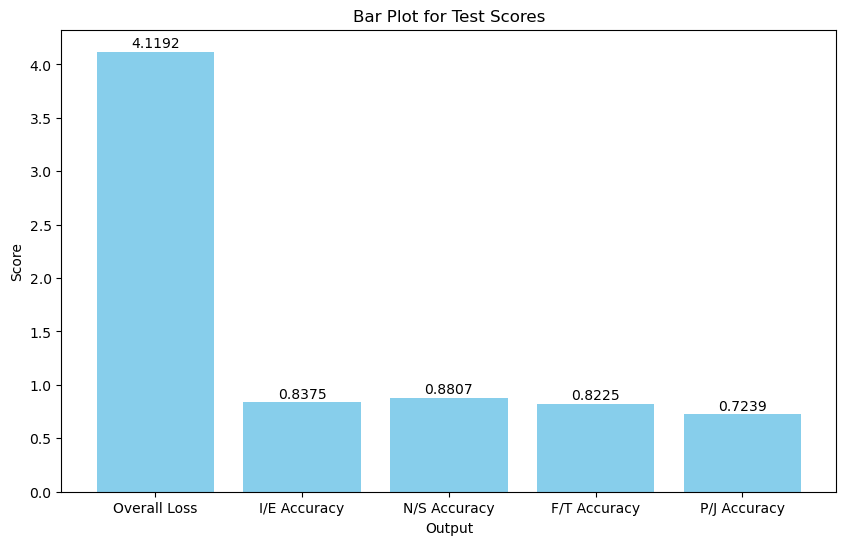

In [188]:
import matplotlib.pyplot as plt

# Define labels for each output
output_labels = ['Overall Loss', 'I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(output_labels, test_scores_list, color='skyblue')
plt.xlabel('Output')
plt.ylabel('Score')
plt.title('Bar Plot for Test Scores')

# Add numbers on top of each bar
for bar, score in zip(bars, test_scores_list):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

plt.show()

In [189]:
import pandas as pd

# Convert the test scores list to a DataFrame
test_scores_df = pd.DataFrame([['MLP'] + test_scores_list], columns=['Model', 'Overall Loss', 'I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy'])

# Display the DataFrame
display(test_scores_df)


,Model,Overall Loss,I/E Accuracy,N/S Accuracy,F/T Accuracy,P/J Accuracy
0,MLP,4.119222,0.837464,0.880692,0.822478,0.723919


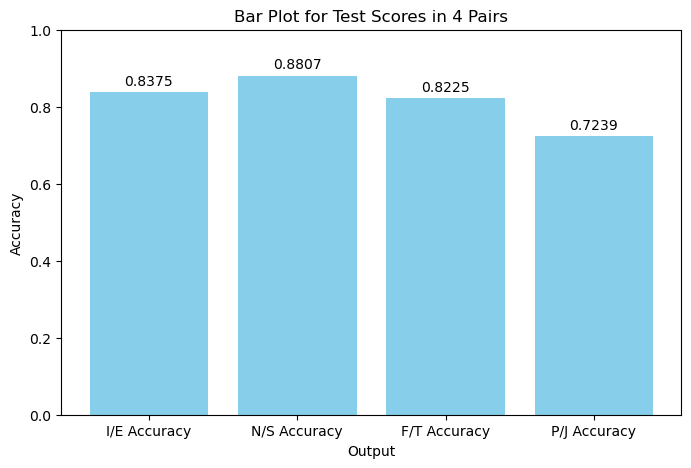

In [190]:
import matplotlib.pyplot as plt

# Define labels for each output
output_labels = ['I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy']

# Selecting test scores for 'Output 1' to 'Output 4'
selected_scores = test_scores_list[1:]

# Plotting the bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(output_labels, selected_scores, color='skyblue')
plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Bar Plot for Test Scores in 4 Pairs')
plt.ylim(0, 1)  # Limiting y-axis from 0 to 1 for accuracy

# Add numbers on top of each bar
for bar, score in zip(bars, selected_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

plt.show()

## Visualize f1,precision,recall and confusion matrix (Model 1)

In [191]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Generate predictions for each output
predictions = mlp_model.predict(X_test)

# Extract predictions for each output
y_pred_output1 = predictions[0]  # Assuming output1 is the first output
y_pred_output2 = predictions[1]  # Assuming output2 is the second output
y_pred_output3 = predictions[2]  # Assuming output3 is the third output
y_pred_output4 = predictions[3]  # Assuming output4 is the fourth output

# Calculate precision, recall, and F1-score for each output
precision_output1 = precision_score(y1_test, (y_pred_output1 > 0.5))
recall_output1 = recall_score(y1_test, (y_pred_output1 > 0.5))
f1_score_output1 = f1_score(y1_test, (y_pred_output1 > 0.5))

precision_output2 = precision_score(y2_test, (y_pred_output2 > 0.5))
recall_output2 = recall_score(y2_test, (y_pred_output2 > 0.5))
f1_score_output2 = f1_score(y2_test, (y_pred_output2 > 0.5))

precision_output3 = precision_score(y3_test, (y_pred_output3 > 0.5))
recall_output3 = recall_score(y3_test, (y_pred_output3 > 0.5))
f1_score_output3 = f1_score(y3_test, (y_pred_output3 > 0.5))

precision_output4 = precision_score(y4_test, (y_pred_output4 > 0.5))
recall_output4 = recall_score(y4_test, (y_pred_output4 > 0.5))
f1_score_output4 = f1_score(y4_test, (y_pred_output4 > 0.5))

# Compute confusion matrix for each output
conf_matrix_output1 = confusion_matrix(y1_test, (y_pred_output1 > 0.5))
conf_matrix_output2 = confusion_matrix(y2_test, (y_pred_output2 > 0.5))
conf_matrix_output3 = confusion_matrix(y3_test, (y_pred_output3 > 0.5))
conf_matrix_output4 = confusion_matrix(y4_test, (y_pred_output4 > 0.5))

# Display the results
print("Output 1:")
print("Precision:", precision_output1)
print("Recall:", recall_output1)
print("F1-score:", f1_score_output1)
print("Confusion Matrix:")
print(conf_matrix_output1)

print("\nOutput 2:")
print("Precision:", precision_output2)
print("Recall:", recall_output2)
print("F1-score:", f1_score_output2)
print("Confusion Matrix:")
print(conf_matrix_output2)

print("\nOutput 3:")
print("Precision:", precision_output3)
print("Recall:", recall_output3)
print("F1-score:", f1_score_output3)
print("Confusion Matrix:")
print(conf_matrix_output3)

print("\nOutput 4:")
print("Precision:", precision_output4)
print("Recall:", recall_output4)
print("F1-score:", f1_score_output4)
print("Confusion Matrix:")
print(conf_matrix_output4)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Output 1:
Precision: 0.6907216494845361
Recall: 0.5261780104712042
F1-score: 0.5973254086181278
Confusion Matrix:
[[1263   90]
 [ 181  201]]

Output 2:
Precision: 0.7083333333333334
Recall: 0.2764227642276423
F1-score: 0.39766081871345027
Confusion Matrix:
[[1461   28]
 [ 178   68]]

Output 3:
Precision: 0.8229166666666666
Recall: 0.7919799498746867
F1-score: 0.8071519795657726
Confusion Matrix:
[[801 136]
 [166 632]]

Output 4:
Precision: 0.6627118644067796
Recall: 0.5844544095665172
F1-score: 0.6211278792692613
Confusion Matrix:
[[867 199]
 [278 391]]


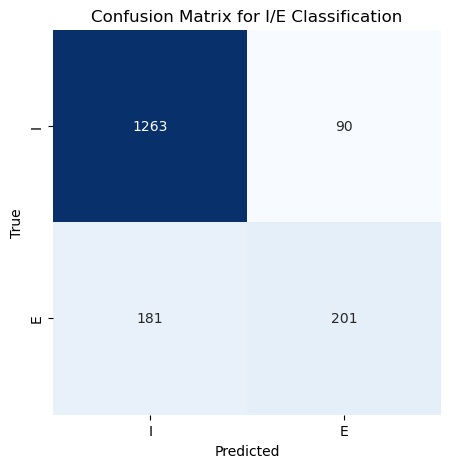

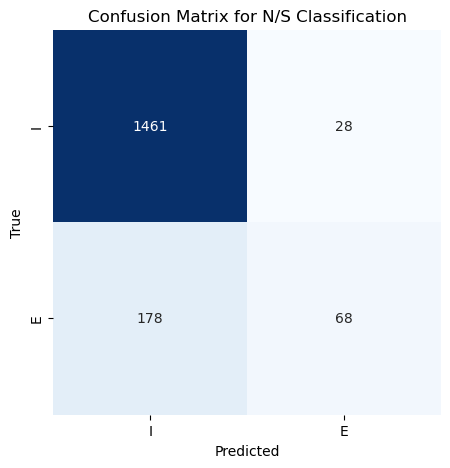

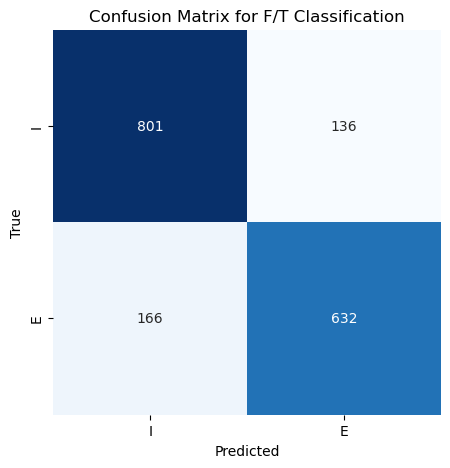

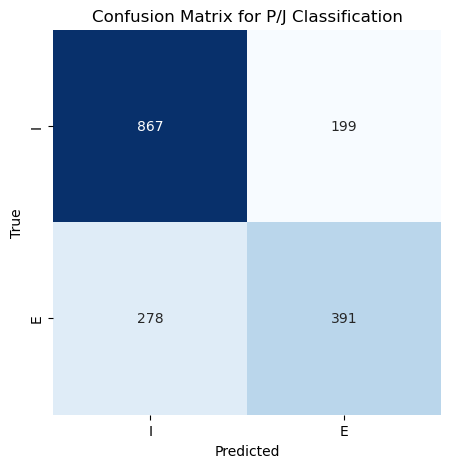

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["I", "E"], yticklabels=["I", "E"])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrices for each output
plot_confusion_matrix(conf_matrix_output1, "Confusion Matrix for I/E Classification")
plot_confusion_matrix(conf_matrix_output2, "Confusion Matrix for N/S Classification")
plot_confusion_matrix(conf_matrix_output3, "Confusion Matrix for F/T Classification")
plot_confusion_matrix(conf_matrix_output4, "Confusion Matrix for P/J Classification")



In [196]:
import pandas as pd

# Define the data for the table
data = {
    'MLP': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'I/E': [accuracy_output1, f1_score_output1, precision_output1, recall_output1],
    'N/S': [accuracy_output2, f1_score_output2, precision_output2, recall_output2],
    'F/T': [accuracy_output3, f1_score_output3, precision_output3, recall_output3],
    'P/J': [accuracy_output4, f1_score_output4, precision_output4, recall_output4]
}

# Create a DataFrame
table_df = pd.DataFrame(data)

# Apply styling
styled_table_df = table_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table_df


,MLP,I/E,N/S,F/T,P/J
0,Accuracy,0.843804,0.881268,0.825937,0.725072
1,F1-score,0.597325,0.397661,0.807152,0.621128
2,Precision,0.690722,0.708333,0.822917,0.662712
3,Recall,0.526178,0.276423,0.791980,0.584454


## Visualize performance ( Model 1-3 )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for each output
output_labels = ['Overall Loss', 'I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy']

# Define test scores for three models (assuming test_scores_list1, test_scores_list2, test_scores_list3 are lists of scores for each model)
test_scores_lists = [test_scores_list1, test_scores_list2, test_scores_list3]
model_names = ['Model 1', 'Model 2', 'Model 3']
colors = ['blue', 'red', 'green']

# Plotting the bar plot
plt.figure(figsize=(12, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
positions = np.arange(len(output_labels))

# Plot bars for each model
for i, scores_list in enumerate(test_scores_lists):
    bars = plt.bar(positions + i * bar_width, scores_list, bar_width, color=colors[i], label=model_names[i])

plt.xlabel('Output')
plt.ylabel('Score')
plt.title('Bar Plot for Test Scores')
plt.xticks(positions + bar_width, output_labels)
plt.legend()

# Add numbers on top of each bar
for i, bars in enumerate(zip(*plt.gca().containers)):
    for bar, score in zip(bars, test_scores_lists[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd

# Assuming you have test scores lists for three models: test_scores_list1, test_scores_list2, test_scores_list3
# Assuming you have model names for three models: 'MLP', 'Model 2', 'Model 3'

# Concatenate test scores for all models
all_test_scores = [
    ['MLP'] + test_scores_list1,
    ['Model 2'] + test_scores_list2,
    ['Model 3'] + test_scores_list3
]

# Create a DataFrame
test_scores_df = pd.DataFrame(all_test_scores, columns=['Model', 'Overall Loss', 'I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy'])

# Display the DataFrame
display(test_scores_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels for each output
output_labels = ['I/E Accuracy', 'N/S Accuracy', 'F/T Accuracy', 'P/J Accuracy']

# Test scores for three models (assuming test_scores_list1, test_scores_list2, test_scores_list3 are lists of scores for each model)
test_scores_lists = [test_scores_list1[1:], test_scores_list2[1:], test_scores_list3[1:]]
model_names = ['Model 1', 'Model 2', 'Model 3']
colors = ['blue', 'red', 'green']

# Plotting the bar plot
plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
positions = np.arange(len(output_labels))

# Plot bars for each model
for i, scores_list in enumerate(test_scores_lists):
    bars = plt.bar(positions + i * bar_width, scores_list, bar_width, color=colors[i], label=model_names[i])

plt.xlabel('Output')
plt.ylabel('Accuracy')
plt.title('Bar Plot for Test Scores in 4 Pairs')
plt.xticks(positions + bar_width, output_labels)
plt.legend()

# Add numbers on top of each bar
for i, bars in enumerate(zip(*plt.gca().containers)):
    for bar, score in zip(bars, test_scores_lists[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

plt.show()

## Visualize prediciton ( Model 1-3 )

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_test, y_tests, output_labels):
    results = {}
    
    # Generate predictions for each output
    predictions = model.predict(X_test)
    
    for i, y_test in enumerate(y_tests):
        y_pred = predictions[i]
        output_label = output_labels[i]
        
        # Calculate precision, recall, and F1-score
        precision = precision_score(y_test, (y_pred > 0.5))
        recall = recall_score(y_test, (y_pred > 0.5))
        f1 = f1_score(y_test, (y_pred > 0.5))
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, (y_pred > 0.5))
        
        # Store results
        results[output_label] = {'Precision': precision, 'Recall': recall, 'F1-score': f1, 'Confusion Matrix': conf_matrix}
    
    return results

# Assuming you have three models: mlp_model1, mlp_model2, mlp_model3
# Assuming X_test, y_tests, and output_labels are lists containing test data and labels for each model

models = [mlp_model1, mlp_model2, mlp_model3]
results = []

for model in models:
    results.append(evaluate_model(model, X_test, [y1_test, y2_test, y3_test, y4_test], ['Output 1', 'Output 2', 'Output 3', 'Output 4']))

# Print results for each model
for i, model_results in enumerate(results):
    print(f"Model {i+1} Results:")
    for output_label, metrics in model_results.items():
        print(f"\n{output_label}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrices for each output
def plot_confusion_matrices(conf_matrices, titles):
    num_matrices = len(conf_matrices)
    fig, axes = plt.subplots(1, num_matrices, figsize=(5*num_matrices, 5))
    if num_matrices == 1:
        axes = [axes]  # Ensure axes is always a list
        
    for i, (conf_matrix, title) in enumerate(zip(conf_matrices, titles)):
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=["I", "E"], yticklabels=["I", "E"], ax=axes[i])
        axes[i].set_title(title)
        axes[i].set_xlabel('Predicted')
        axes[i].set_ylabel('True')
    
    plt.tight_layout()
    plt.show()

# Plot confusion matrices for each output for three models
plot_confusion_matrices([conf_matrix_output1_model1, conf_matrix_output1_model2, conf_matrix_output1_model3],
                        ["Model 1 - Confusion Matrix for I/E Classification",
                         "Model 2 - Confusion Matrix for I/E Classification",
                         "Model 3 - Confusion Matrix for I/E Classification"])

plot_confusion_matrices([conf_matrix_output2_model1, conf_matrix_output2_model2, conf_matrix_output2_model3],
                        ["Model 1 - Confusion Matrix for N/S Classification",
                         "Model 2 - Confusion Matrix for N/S Classification",
                         "Model 3 - Confusion Matrix for N/S Classification"])

plot_confusion_matrices([conf_matrix_output3_model1, conf_matrix_output3_model2, conf_matrix_output3_model3],
                        ["Model 1 - Confusion Matrix for F/T Classification",
                         "Model 2 - Confusion Matrix for F/T Classification",
                         "Model 3 - Confusion Matrix for F/T Classification"])

plot_confusion_matrices([conf_matrix_output4_model1, conf_matrix_output4_model2, conf_matrix_output4_model3],
                        ["Model 1 - Confusion Matrix for P/J Classification",
                         "Model 2 - Confusion Matrix for P/J Classification",
                         "Model 3 - Confusion Matrix for P/J Classification"])


In [ ]:
import pandas as pd

# Define the data for the table for each model
data_model1 = {
    'Model': ['Model 1', 'Model 1', 'Model 1', 'Model 1'],
    'Output': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'I/E': [accuracy_output1_model1, f1_score_output1_model1, precision_output1_model1, recall_output1_model1],
    'N/S': [accuracy_output2_model1, f1_score_output2_model1, precision_output2_model1, recall_output2_model1],
    'F/T': [accuracy_output3_model1, f1_score_output3_model1, precision_output3_model1, recall_output3_model1],
    'P/J': [accuracy_output4_model1, f1_score_output4_model1, precision_output4_model1, recall_output4_model1]
}

data_model2 = {
    'Model': ['Model 2', 'Model 2', 'Model 2', 'Model 2'],
    'Output': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'I/E': [accuracy_output1_model2, f1_score_output1_model2, precision_output1_model2, recall_output1_model2],
    'N/S': [accuracy_output2_model2, f1_score_output2_model2, precision_output2_model2, recall_output2_model2],
    'F/T': [accuracy_output3_model2, f1_score_output3_model2, precision_output3_model2, recall_output3_model2],
    'P/J': [accuracy_output4_model2, f1_score_output4_model2, precision_output4_model2, recall_output4_model2]
}

data_model3 = {
    'Model': ['Model 3', 'Model 3', 'Model 3', 'Model 3'],
    'Output': ['Accuracy', 'F1-score', 'Precision', 'Recall'],
    'I/E': [accuracy_output1_model3, f1_score_output1_model3, precision_output1_model3, recall_output1_model3],
    'N/S': [accuracy_output2_model3, f1_score_output2_model3, precision_output2_model3, recall_output2_model3],
    'F/T': [accuracy_output3_model3, f1_score_output3_model3, precision_output3_model3, recall_output3_model3],
    'P/J': [accuracy_output4_model3, f1_score_output4_model3, precision_output4_model3, recall_output4_model3]
}

# Create DataFrames
df_model1 = pd.DataFrame(data_model1)
df_model2 = pd.DataFrame(data_model2)
df_model3 = pd.DataFrame(data_model3)

# Concatenate DataFrames vertically
table_df = pd.concat([df_model1, df_model2, df_model3], ignore_index=True)

# Apply styling
styled_table_df = table_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]}
]).set_properties(**{'text-align': 'center'})

# Display the styled table
styled_table_df
